<a href="https://colab.research.google.com/github/JNario31/DimensionReductionAlgorithms/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# download MNIST data

!gdown --folder https://drive.google.com/drive/folders/1r20aRjc2iu9O3kN3Xj9jNYY2uMgcERY1 2> /dev/null

#install python_mnist

!pip install python_mnist

Processing file 1Jf2XqGR7y1fzOZNKLJiom7GmZZUzXhfs t10k-images-idx3-ubyte
Processing file 1qiYu9dW3ZNrlvTFO5fI4qf8Wtr8K-pCu t10k-labels-idx1-ubyte
Processing file 1SnWvBcUETRJ53rEJozFUUo-hOQFPKxjp train-images-idx3-ubyte
Processing file 1kKEIi_pwVHmabByAnwZQsaMgro9XiBFE train-labels-idx1-ubyte


In [3]:
#load MINST training images

from mnist import MNIST
import numpy as np

mnist_loader = MNIST('MNIST')
train_data, train_label = mnist_loader.load_training()

train_data = np.array(train_data)
train_label = np.array(train_label)

# Array dimensions 60000x784, there are 60000 images, and 784 pixels per image
# each image is 28x28 pixels, flattened to 784 pixel vector
print(train_data.shape)

# Vector dimension of 60000x1, this is each label per sample
# hence it is the same number of images
print(train_label.shape)

(60000, 784)
(60000,)


The Covariance matrix captures how features vary together. The PCA finds directions (principal components) where the data variance is
maximized.

Center the data, then get the dot product between its transposed self, which gives you the sum of the outer products. Then normalize the data by dividing by the number of samples.

PCA reduces dimensionality by projecting data onto the directions (eigenvectors) where variance is the highest. Eigenvalues tell how much variance is explained by each vector.

Eigenvalues: represent the amount of variance captured by each principal component

Eigenvectors: Each column in the matrix corresponding to a eigenvalue (principal components)

To determine which principal components capture the most variance sort the eigenvalues in descending order.

In [4]:
# X is the data to be trained
# M is the number of principal components to be kept
# Returns the top m eigenvalues, and the PCA matrix
def PCA(X, m):
  # Compute covariance matrix
  mean = np.mean(X, axis=0) # Calculate the mean of each feature (each column)
  S = (X-mean).T @ (X-mean) / X.shape[0]

  # Compute eigenvalues and eigenvectors
  eigenvalues, eigenvectors = np.linalg.eigh(S)

  # Sort eigen values from large to small
  idx = np.argsort(-np.abs(eigenvalues))

  return np.real(eigenvalues[idx[:m]]), np.transpose(np.real(eigenvectors[:, idx[:m]]))

In [5]:
# Load images 1 and 7
digit_index = np.logical_or(train_label == 1, train_label == 7)
X = train_data[digit_index]
m = X.shape[1] # Data's principal components

eigenvalues, eigenvectors = PCA(X, m)

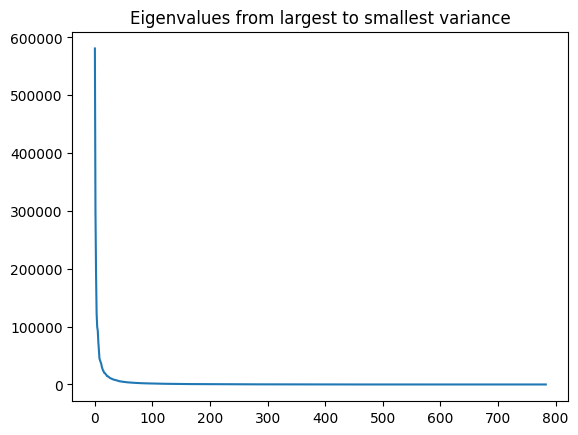

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.title('Eigenvalues from largest to smallest variance')
plt.plot(eigenvalues)
plt.show()

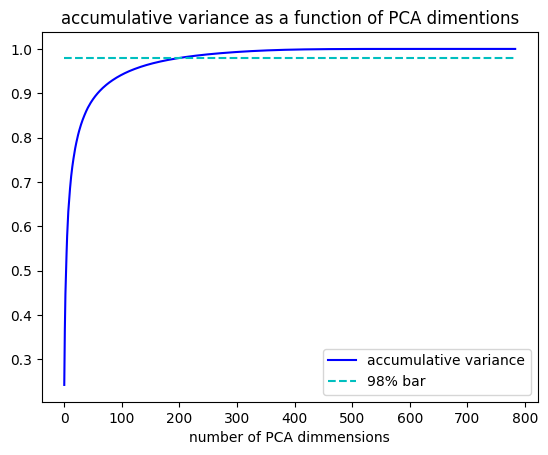

In [9]:
# Plot accumulative sum
total_var = np.cumsum(eigenvalues)/np.sum(eigenvalues)
plt.title('accumulative variance as a function of PCA dimentions')
plt.xlabel('number of PCA dimmensions')
plt.plot(total_var, 'b', 0.98*np.ones(total_var.shape[0]), 'c--')
plt.legend(['accumulative variance', '98% bar'])

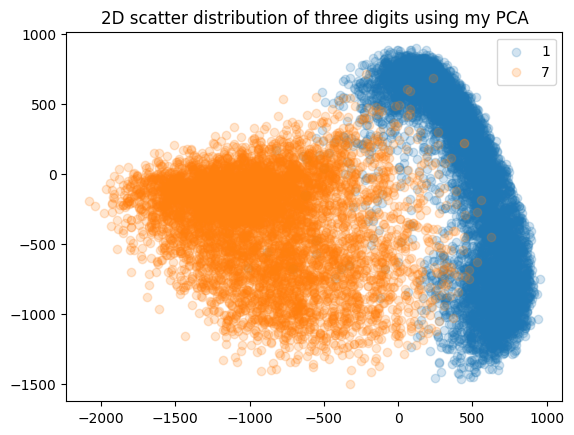

In [8]:
# 2D visualization scatter for three digits using 2D PCA

eigenvalues, eigenvectors = PCA(X, 2)

X1 = train_data[train_label == 1]
Y1 = np.transpose(eigenvectors @ X1.T)
X7 = train_data[train_label == 7]
Y7 = np.transpose(eigenvectors @ X7.T)

plt.title('2D scatter distribution of three digits using my PCA')
plt.scatter(x=Y1[:, 0], y=Y1[:, 1], color='#1f77b4', alpha=0.20, label='4')
plt.scatter(x=Y7[:, 0], y=Y7[:, 1],  color='#ff7f0e', alpha=0.20, label='7')
plt.legend(['1', '7'])

This graph shows how the variance accumulates as you add more principal components. As you can see in the graph you reach 98% of the variance already by approximately 200 components.

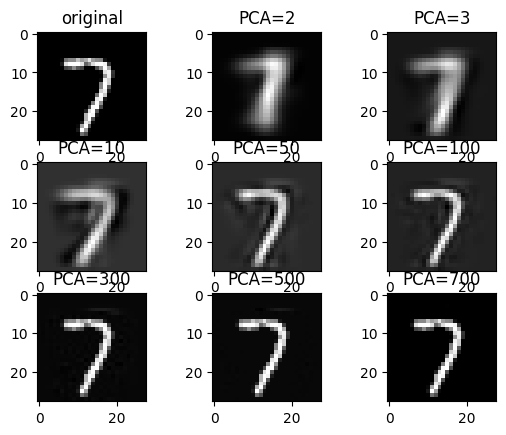

In [10]:
X7 = train_data[train_label == 7]
x = X7[200,:] #Specify any label for image recovery

eigenvalue, eigenvector = PCA(X7, X7.shape[1])

fig = plt.figure()

img = x.reshape(28,-1)  #reshape each image from 1x784 to 28x28 for display
ax = fig.add_subplot(3,3,1)
ax.title.set_text('original')

plt.imshow(img, cmap='gray')

n = 2
for m in [2, 3, 10, 50, 100, 300, 500, 700]:
  eigenvector_m = eigenvector[:m,:]
  y = np.transpose(eigenvector_m @ x.T)

  # recovery formula on page 83
  #x_hat = y @ A_m
  # recovery formula from Q4.3 on page 93
  x_hat = y @ eigenvector_m + (np.identity(eigenvector_m.shape[1]) - eigenvector_m.T @ eigenvector_m) @ X.mean(axis=0)

  img = x_hat.reshape(28,-1)
  ax = fig.add_subplot(3,3,n)
  label = "PCA=%d" % m
  ax.title.set_text(label)
  plt.imshow(img, cmap='gray')
  n = n+1

plt.show(block=True)
